# Análise Crédito - Resultados 

# Imports

In [21]:
import seaborn as sns
import warnings
import pandas as pd
import matplotlib.pyplot as plt; 
import lightgbm as lgb
import shap
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [9]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

# Parameters

# Definitions

In [23]:
FEATURES = ["monthly_income", 'collateral_value', "loan_amount", "collateral_debt","verified_restriction", "dishonored_checks", 
            "expired_debts", "banking_debts", "commercial_debts", "protests", "informed_restriction", "monthly_payment", "auto_brand",
            "auto_model", "auto_year", "form_completed", "channel", "landing_page", "landing_page_product", "utm_term"]

# Metrics

In [12]:
df_metrics = pd.read_csv("./metrics.csv")

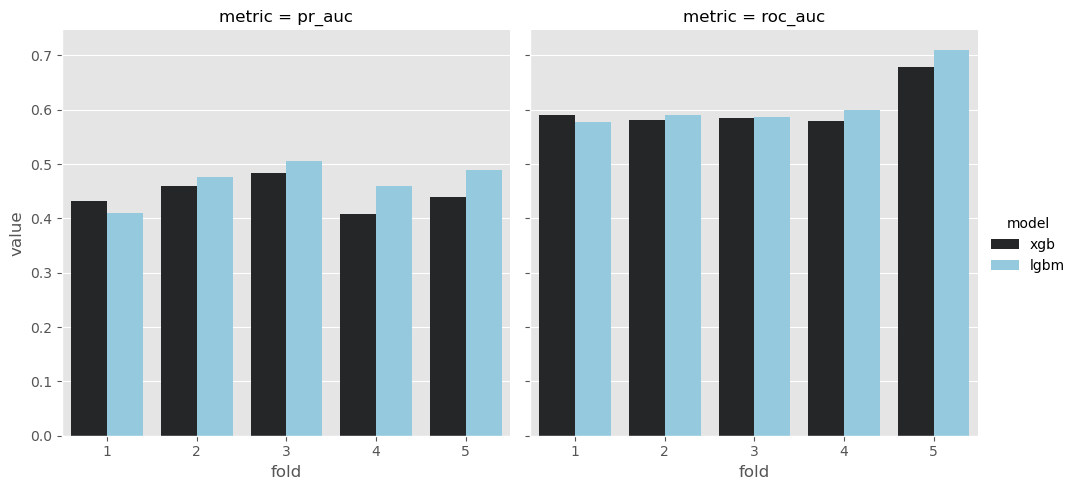

In [13]:
sns.catplot(
    data=df_metrics, x="fold", y="value", col="metric", hue="model",
    kind="bar", height=5, aspect=1.0, color='skyblue',
)

# Explanation (SHAP) 

In [17]:
bst = lgb.Booster(model_file="lgbm_model_fold_3.txt") # 0.503 of PR-AUC 

In [19]:
df_train = pd.read_pickle("df_train_fold_3.pkl")
df_test = pd.read_pickle("df_test_fold_3.pkl")

In [24]:
explainer_lightgbm = shap.TreeExplainer(bst)
shap_values_lightgbm = explainer_lightgbm(df_train[FEATURES])

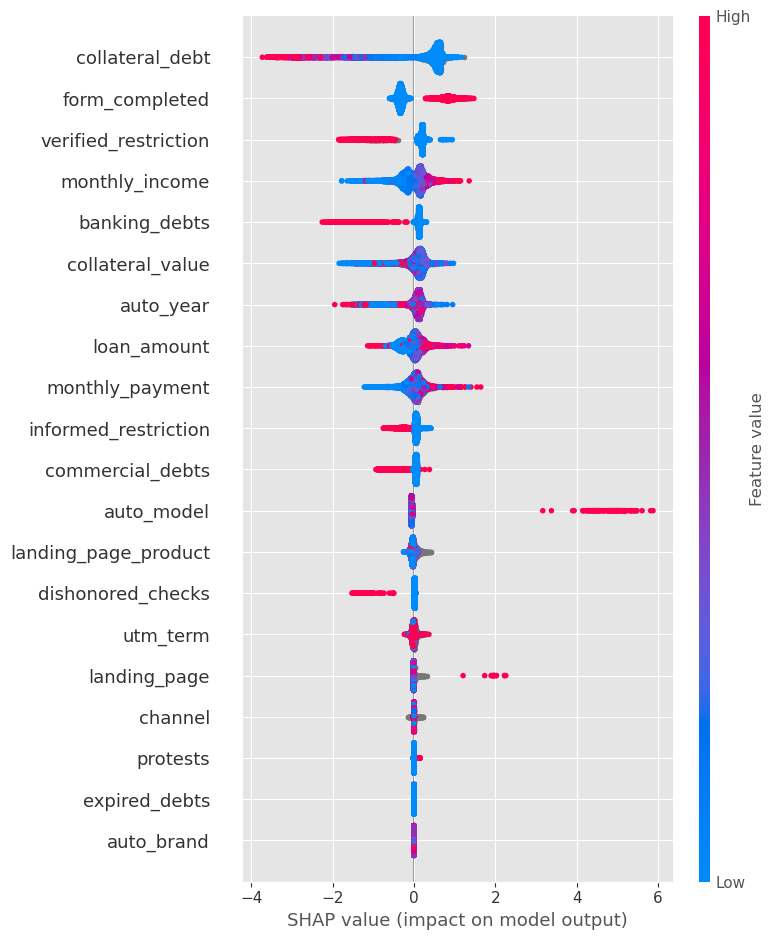

In [25]:
shap.summary_plot(shap_values_lightgbm, df_train[FEATURES])